In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import classification_report

In [38]:
df = pd.read_csv('email.csv')
print(df.head(5))

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


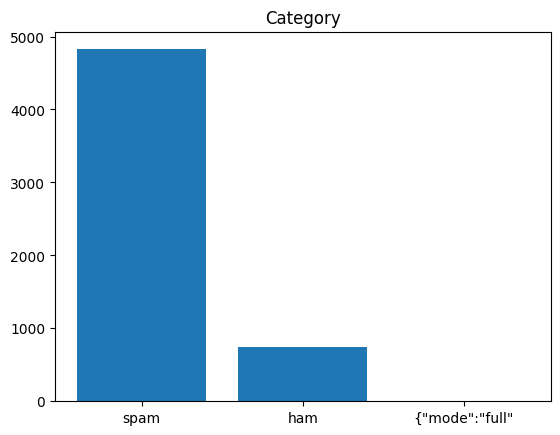

In [39]:
frequency = df['Category'].value_counts()
values = list(set(df['Category'].to_list()))
values = list(map(lambda x: str(x), values))
plt.bar(values, frequency)
plt.title('Category')
plt.show()

In [40]:
df = df[df['Category'] != '{"mode":"full"']

In [41]:
def clean(sentence) :
    message = sentence.lower()
    message_arr = word_tokenize(message)
    useful = [word for word in message_arr if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_arr = list(map(lambda x: lemmatizer.lemmatize(x), useful))
    return ' '.join(lemmatized_arr)


In [42]:
messages = df['Message'].to_list()
arr = list(map(lambda x: clean(x), messages))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(arr).toarray()
Y = df['Category']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

The following implementations of the naive Bayesian classifier are the most suitable for this task:
1) Multinomial naive Bayesian classifier (MultinomialNB) is a variant for dealing with discrete features that have a multinomial distribution. Such features are often found in text classification tasks, where they represent the number of occurrences in a text.
2) Complementary naive Bayesian classifier (ComplementNB) is an improved version of MultinomialNB, suitable for unbalanced datasets. Instead of estimating the probability of a feature given a class, the algorithm estimates the normalized feature weight for a class as the probability of the feature given the complement of the class, i.e., all other classes. Thus, the algorithm takes into account not only the frequency of features in a class but also their absence in other classes, making it less sensitive to sampling bias.
3) Bernoulli naive Bayesian classifier (BernoulliNB) is another option for dealing with discrete features, but which have a Bernoulli distribution. In this case, features are binary indicators of the presence or absence of certain properties in an object. For example, in the task of text classification it can be the presence or absence of certain words in the text.

In [43]:
nbc = MultinomialNB()
nbc.fit(x_train, y_train)
y_predicted = nbc.predict(x_test)
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       484
        spam       0.93      0.92      0.93        74

    accuracy                           0.98       558
   macro avg       0.96      0.95      0.96       558
weighted avg       0.98      0.98      0.98       558



In [44]:
nbc = BernoulliNB()
nbc.fit(x_train, y_train)
y_predicted = nbc.predict(x_test)
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       494
        spam       0.86      0.98      0.92        64

    accuracy                           0.98       558
   macro avg       0.93      0.98      0.95       558
weighted avg       0.98      0.98      0.98       558



In [45]:
nbc = ComplementNB()
nbc.fit(x_train, y_train)
y_predicted = nbc.predict(x_test)
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       460
        spam       0.96      0.71      0.82        98

    accuracy                           0.94       558
   macro avg       0.95      0.85      0.89       558
weighted avg       0.95      0.94      0.94       558



As a result, the Multinomial NB algorithm showed the best result